In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
%matplotlib inline

In [3]:
# data is in the data directory
data = pd.read_csv("../data/AADF_Devon_VehicleFlows.csv", header = 0)

# I used http://www.gridreferencefinder.com/ to get these coordinates. I manually drew a box and made pointers for the 
# four corners of the box
exeter_coords = pd.read_csv("../data/Exeter_box.csv", header = 0)

In [7]:
max_east = max(exeter_coords["Easting"])
max_north = max(exeter_coords["Northing"])
min_east = min(exeter_coords["Easting"])
min_north = min(exeter_coords["Northing"])

In [8]:
data_exeter = data[(data["Easting"] > min_east) & (data["Easting"] < max_east) & (data["Northing"] > min_north) 
                   & (data["Northing"] < max_north) ]

In [10]:
# How many unique points in Exeter
len(data_exeter["CP"].unique())

16

In [11]:
data_exeter.count()

AADFYear                240
CP                      240
Region                  240
LocalAuthority          240
Road                    240
RoadCategory            240
Easting                 240
Northing                240
StartJunction           240
EndJunction             240
LinkLength_km           240
LinkLength_miles        240
PedalCycles             240
Motorcycles             240
CarsTaxis               240
BusesCoaches            240
LightGoodsVehicles      240
V2AxleRigidHGV          240
V3AxleRigidHGV          240
V4or5AxleRigidHGV       240
V3or4AxleArticHGV       240
V5AxleArticHGV          240
V6orMoreAxleArticHGV    240
AllHGVs                 240
AllMotorVehicles        240
dtype: int64

No nans in the data this time.

Let's make some scatter plots to see if there are some trends and outliers

/home/sophie/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


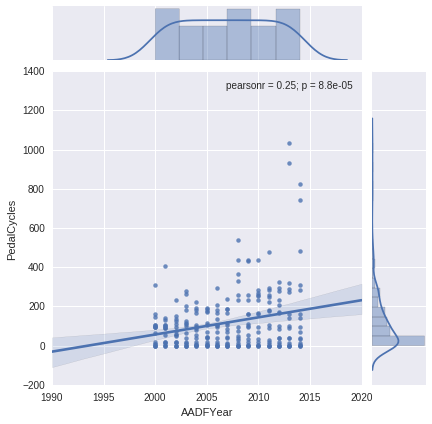

In [12]:
# try a scatterplot with trend lines in seaborn
sns.jointplot(x="AADFYear", y="PedalCycles", data=data_exeter, kind = "reg")

Looks like there are quite a lot of low values in the cycling distribution. Lets see how many zeros.

In [13]:
# put all rows where cycling is 0 into a new dataframe for investigation

cycles_gt0 = data_exeter[data_exeter["PedalCycles"] > 0]
cycles_0 = data_exeter[data_exeter["PedalCycles"] == 0]
print(len(cycles_gt0))
print(len(cycles_0))

201
39


In [50]:
print("roads which have had cycles on them since 2000 = \n", cycles_gt0["Road"].unique())
print("roads which at some point don't have any cylists = \n", cycles_0["Road"].unique())

roads which have had cycles on them since 2000 = 
 ['A379' 'A377' 'A376' 'A3015' 'A30']
roads which at some point don't have any cylists = 
 ['M5' 'A30']


The A30 doesn't look nice for cycling, and I'm pretty sure it would be illegal on the M5. 

In [60]:
print (data_exeter["PedalCycles"][(data["Road"] == "M5") & (data["PedalCycles"] > 0)])
print (data_exeter["PedalCycles"][(data["Road"] == "A30") & (data["PedalCycles"] > 0)])

Series([], Name: PedalCycles, dtype: int64)
330     1
1014    1
1242    1
2162    1
2395    1
3322    2
Name: PedalCycles, dtype: int64


There are no cylists recorded on the M5 and only 1 or 2 on the A30. Lets try the trend line again, without the M5 0s which we can safely remove

/home/sophie/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


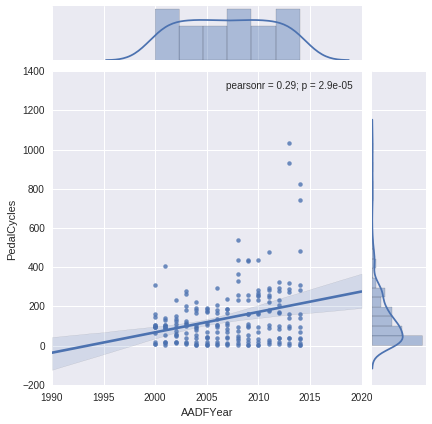

In [81]:
sns.jointplot(x="AADFYear", y="PedalCycles", data=cycles_gt0, kind = "reg")

What are the trends with some of the other vehicle categories?

How many of the roads in Exeter fall into Urban/Rural categories? I think we want to focus on those that are urban.

In [1]:
data_exeter["RoadCategory"].unique()

NameError: name 'data_exeter' is not defined

There are only four road categories in the Exeter box.
How many in each?

In [78]:
road_categories = data_exeter.groupby(["RoadCategory"]).count()

print(road_categories["CP"]) # it doesn't matter which field you use.

RoadCategory
PR     90
PU    105
TM     30
TR     15
Name: CP, dtype: int64


/home/sophie/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


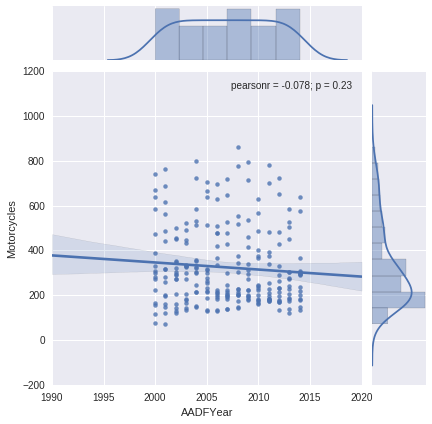

In [83]:
sns.jointplot(x="AADFYear", y="Motorcycles", data=data_exeter, kind = "reg")

/home/sophie/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


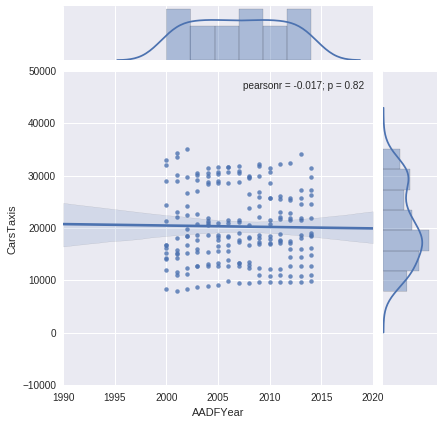

In [82]:
sns.jointplot(x="AADFYear", y="CarsTaxis", data=cycles_gt0, kind = "reg")

/home/sophie/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


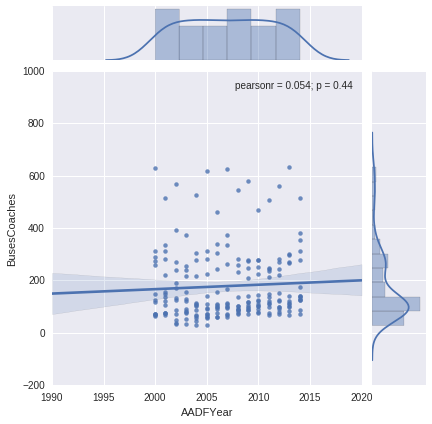

In [84]:
sns.jointplot(x="AADFYear", y="BusesCoaches", data=cycles_gt0, kind = "reg")

/home/sophie/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


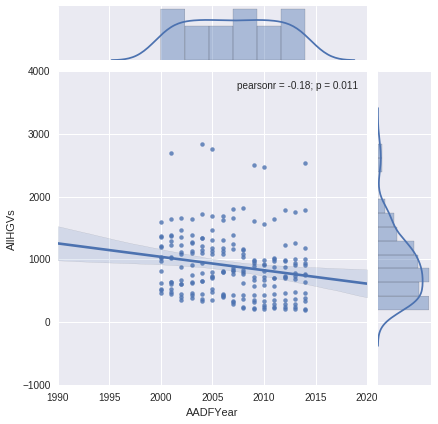

In [85]:
sns.jointplot(x="AADFYear", y="AllHGVs", data=cycles_gt0, kind = "reg")

/home/sophie/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


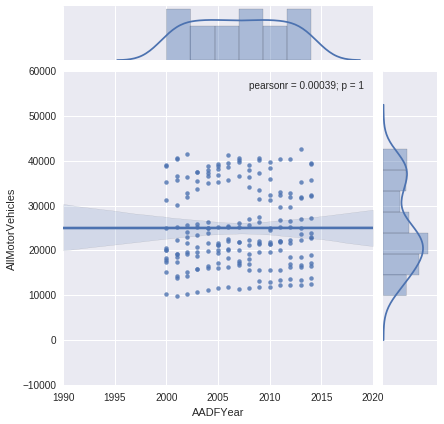

In [86]:
sns.jointplot(x="AADFYear", y="AllMotorVehicles", data=cycles_gt0, kind = "reg")

In [87]:
# Save data_exeter for future use
data_exeter.to_csv("../data/Exeter_city_only.csv", index=False)

Are there any CP's with incomplete records over the period?

In [91]:
unique_roads = data_exeter["CP"].unique()


cp_missing = []

for i,road in enumerate(unique_roads):
    years = len(data_exeter[data_exeter["CP"] == road])
    if years != 15:
        print(years)
        print("There are not 15 years worth of data at %s" %road)
        cp_missing.append(road)

Nope, apparently not. This is good! 